# Lead Free Buffalo ML Model

## Data Preprocessing: Flint Data

This notebook records the procedure I used to preprocess the Flint data for my project [Lead Free Buffalo](https://leadfreebflo.com).

This notebook has a slightly different scope than the Buffalo data preprocessing notebook. Since I used the Zillow API to assemble the, 

I will only be doing a small amount of preprocessing in this notebook, much of the data preparation has been done prior to this and I won't repeat it all. 

1. Load in the CSV files `joined_lead_hud.csv`, which contains results from the lead testing campaign and data from HUD on housing values, and `z_data_flint`, which contains the Zillow data I have . I needed to use this because the HUD data does not contain a home age feature, and that is a very important 
2. Merge the two resulting dataframes on addresses
3. Do some inspection of the data to validate the processing work.
4. Visualize the data.
5. Begin learning on the data and see what the results are like.

We begin with some imports and loading in the data:

In [20]:
import pandas as pd

%matplotlib inline

lead_hud_data_flint = pd.read_csv('data-flint/joined_lead_hud.csv', encoding='unicode_escape', index_col = 0)
zillow_data_flint = pd.read_csv('data-flint/z_data_flint.csv', encoding='unicode_escape', index_col = 0)

#print(lead_hud_data_flint.count(), zillow_data_flint.count())

zillow_data_flint.loc[4970]
lead_hud_data_flint.iloc[4970]

Sample Number                         LG46219
Date Submitted            2016-05-19 12:36:44
Analysis (Lead)                          Lead
Lead (ppb)                                  4
Analysis (Copper)                      Copper
Copper (ppb)                              220
Prop_Num_str                             5605
PropStreet                          DUPONT ST
City                                    FLINT
Prop_Zip_x                              48505
CCond2013                                    
CenBlock                                    3
CenTract                                  300
Class                                      RI
DPVACT                                      N
DPVNOST                                     N
DRAFT_Zone                               TN-2
ECF                                       170
HCond2012                                Good
HCond2014                                Good
Homestead                                 100
Land_Usex                         

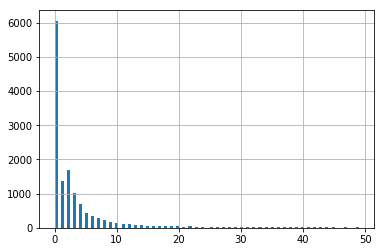

In [13]:
#lead_hud_data_flint['Prop_Num_str'] = joined_lead_hud_data['Prop_Num_str'].astype(str)
#zillow_data_flint['street_upper'] = joined

#house_lead_flint_mergeddata = 

lead_hist = lead_hud_data_flint.loc[lead_hud_data_flint['Lead (ppb)'] < 50]['Lead (ppb)'].hist(bins = 100)

## Census tool

Using the census tool again. Fortunately we only have ~15,000 rows, so we should be able to do this in a 

house number and street name in one field, city in the next, then state, then 5-digit zip code. The

In [45]:
import numpy as np

leadhud_flint_census = lead_hud_data_flint[['TaxPAddres', 'TaxPCity', 'TaxPState', 'TaxPZip']]

leadhud_flint_census_1, leadhud_flint_census_2 = np.array_split(leadhud_flint_census, 2)

In [46]:
zillow_data_flint['zipcode'] = zillow_data_flint['zipcode'].astype(str)

zdata_flint_census = zillow_data_flint[['street', 'city', 'state', 'zipcode']]

zdata_flint_census_1, zdata_flint_census_2 = np.array_split(zdata_flint_census, 2)


for idx, files in enumerate([leadhud_flint_census_1, leadhud_flint_census_2, zdata_flint_census_1, zdata_flint_census_2]):
    with open('data-flint/flint_census_{}.csv'.format(idx), 'w+') as f:
        files.to_csv(f)

Now we upload for processing and then download again

In [44]:
leadhud_flint_census_1

,Sample Number,Date Submitted,Analysis (Lead),Lead (ppb),Analysis (Copper),Copper (ppb),Prop_Num_str,PropStreet,City,Prop_Zip_x,...,TAXSTATx,TaxExempt,TaxPAddres,TaxPCity,TaxPName,TaxPState,TaxPZip,WARDx,Zoning_Dis,lowmod_pct
0,LG07760,2016-02-02 13:28:23,Lead,7.0,Copper,0.0,2417,ADAIR ST,FLINT,48506,...,TAXABLE,0,2417 ADAIR ST,FLINT,"SCHWARTZ, GIZELA ET AL",MI,48506,4,B,0.7000
1,LG10679,2016-02-08 13:05:21,Lead,8.0,Copper,70.0,2421,ADAIR ST,NaN,48506,...,TAXABLE,0,2421 ADAIR ST,FLINT,"SCHUMANN, PHILLIP & KLOPF, PATRICK",MI,48506,4,B,0.7000
2,LG39240,2016-04-25 13:25:18,Lead,7.0,Copper,0.0,2421,ADAIR ST,FLINT,48506,...,TAXABLE,0,2421 ADAIR ST,FLINT,"SCHUMANN, PHILLIP & KLOPF, PATRICK",MI,48506,4,B,0.7000
3,LG26816,2016-03-22 12:30:04,Lead,0.0,Copper,0.0,1817,ADAMS AVE,FLINT,48505,...,TAXABLE,0,1817 ADAMS AVE,FLINT,"PETTEWAY, NAPOLEON",MI,48505,5,B,0.7849
4,LG31026,2016-04-01 12:04:35,Lead,5.0,Copper,120.0,1821,ADAMS AVE,FLINT,48505,...,TAXABLE,0,1821 ADAMS AVE,FLINT,"MORSE, JACK",MI,48505,5,B,0.7849
5,LG05008,2016-01-27 13:10:10,Lead,2.0,Copper,0.0,1902,ADAMS AVE,FLINT,48505,...,TAXABLE,0,1902 ADAMS AVE,FLINT,"BROADNAX, FRANKIE",MI,48505,5,B,0.7849
6,LG05252,2016-01-27 14:10:00,Lead,5.0,Copper,0.0,1902,ADAMS AVE,FLINT,48505,...,TAXABLE,0,1902 ADAMS AVE,FLINT,"BROADNAX, FRANKIE",MI,48505,5,B,0.7849
7,LG11853,2016-02-10 14:13:36,Lead,6.0,Copper,220.0,2005,ADAMS AVE,FLINT,48505,...,TAXABLE,0,2005 ADAMS AVE,FLINT,"KEELS, ROBERT & WF IRENE",MI,48505,5,B,0.7849
8,LG31690,2016-04-05 13:11:57,Lead,7.0,Copper,80.0,2005,ADAMS AVE,FLINT,48505,...,TAXABLE,0,2005 ADAMS AVE,FLINT,"KEELS, ROBERT & WF IRENE",MI,48505,5,B,0.7849
9,LG02548,2016-01-22 12:56:33,Lead,0.0,Copper,90.0,2009,ADAMS AVE,FLINT,48505,...,TAXABLE,0,2009 ADAMS AVE,FLINT,"SMALLEY, RONDA N",MI,48505,5,B,0.7849
